# 3주차 스터디

Made by 35기 코딩부장 류제현

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Pandas를 사용한 데이터 전처리 (심화)

    실제 데이터 전처리 과정을 함께 따라해 봅시다


* 코스닥 상장 기업들의 년도별 전환사채(CB)발행 기록이 담긴 3개의 CSV파일이 있습니다. 
* 데이터셋을 하나로 합치고, 데이터가 완전한지 확인해보겠습니다

    데이터 불러오기

In [4]:
# 우선 데이터셋을 불러오겠습니다
df2019 = pd.read_csv("Data/전환사채권발행결정_코스닥2019.csv", index_col=0)
df2020 = pd.read_csv("Data/전환사채권발행결정_코스닥2020.csv", index_col=0)
df2021 = pd.read_csv("Data/전환사채권발행결정_코스닥2021.csv", index_col=0)

# 그런데 만약 년도가 2000년부터 2020년까지인 경우처럼 엄청 많을 경우 이렇게 코드를 복사하기 귀찮지 않을까요?
# (또한 변수를 너무 많이 만든다는 부담도 있습니다)
# -> CSV파일 이름이 유사한데 반복문으로 해결할 수 있지 않을까요?
# 또한, 이런 경우에 데이터를 저장하기 위해 딕셔너리 자료구조를 자주 사용합니다
df_dict = {}
for year in range(2019,2022):
    tmp = pd.read_csv("Data/전환사채권발행결정_코스닥{}.csv".format(year),
                      index_col=0)
    df_dict[str(year)] = tmp

In [8]:
# key를 통해 값에 접근합니다
df_dict["2020"]

,회사명,기업공시코드,공시일,종류,총액,사채만기일,표면이자율,만기이자율,사채발행방법,공시코드
0,연이비앤티,90740,2020-12-29,무기명식 이권부무보증 사모 전환사채,"10,000,000,000",2024년 04월 09일,0,3,사모,20201229000894
1,연이비앤티,90740,2020-12-29,무기명식 이권부무보증 사모 전환사채,"10,000,000,000",2024년 04월 02일,0,3,사모,20201229000889
2,HLB테라퓨틱스,115450,2020-12-29,무기명식 이권부 무보증 사모 전환사채,"45,000,000,000",2026년 02월 05일,0.0,3.0,사모,20201229000674
3,HLB테라퓨틱스,115450,2020-12-29,무기명식 이권부 무보증 사모 전환사채,"10,000,000,000",2026년 02월 01일,0.0,3.0,사모,20201229000472
4,휴림로봇,90710,2020-12-28,무기명식 이권부 담보부 사모전환사채,"4,000,000,000",2023년 12월 28일,3,5,사모,20201228000974
...,...,...,...,...,...,...,...,...,...,...
399,SGA솔루션즈,184230,2020-01-09,무기명식 이권무 사모 전환사채,"2,000,000,000",2023년 01월 13일,3.0,3.0,사모,20200109000465
400,제넨바이오,72520,2020-01-07,무기명식 이권부무보증 사모 전환사채,"7,000,000,000",2023.01.07,-,3,사모,20200107000385
401,에이아이비트,39230,2020-01-06,무기명식 이권부 무보증 사모 전환사채,"30,000,000,000",2023년 01월 13일,0.0,0.0,사모,20200106000592
402,비엘팜텍,65170,2020-01-03,무기명식 무보증 사모 전환사채,"6,500,000,000",2025년 01월 07일,0,3,사모,20200103000476


In [9]:
os.listdir("Data")

['AMZN.csv',
 '전환사채권발행결정_코스닥2019.csv',
 '전환사채권발행결정_코스닥2020.csv',
 '전환사채권발행결정_코스닥2021.csv']

In [14]:
# os 모듈을 사용하는 방법도 있습니다(폴더 하나에 자기가 원하는 파일만 들어가 있으면 편리합니다)
lst = os.listdir("Data")
sample_dict = {}
for file in lst[1:]:
    sample_dict[file] = pd.read_csv("Data/{}".format(file))

    데이터프레임 합치기

In [18]:
# 데이터 확인
df2019.tail(10)

,회사명,기업공시코드,공시일,종류,총액,사채만기일,표면이자율,만기이자율,사채발행방법,공시코드
450,한국테크놀로지,53590,2019-01-08,무기명식 이권부 무보증 사모 전환사채,"10,000,000,000",2022.01.15,9,10,사모,20190108000847
451,디에스앤엘,141020,2019-01-08,무기명식 무보증 사모 전환사채,"10,000,000,000",2022년 01월 29일,6,6,사모,20190108000728
452,옵트론텍,82210,2019-01-07,무기명식 이권부 무보증 사모 전환사채,"5,000,000,000",2024년 01월 09일,-,-,사모,20190107000666
453,현대바이오,48410,2019-01-07,무기명식 이권부 무보증 사모 전환사채,"7,000,000,000",2022년 01월 07일,1,4,사모,20190107000143
454,리더스 기술투자,19570,2019-01-04,무기명식 이권부 무보증 사모 전환사채,"10,000,000,000",2022년 02월 25일,0,3,사모,20190104000909
455,리더스 기술투자,19570,2019-01-04,무기명식 이권부 무보증 사모 전환사채,"5,000,000,000",2022년 02월 25일,0,3,사모,20190104000906
456,리더스 기술투자,19570,2019-01-04,무기명식 이권부 무보증 사모 전환사채,"6,000,000,000",2022년 01월 10일,0,3,사모,20190104000898
457,장원테크,174880,2019-01-04,무기명식 이권부 무보증 사모 전환사채,"20,000,000,000",2022년 02월 27일,2.0,2.0,사모,20190104000871
458,엔에스엔,31860,2019-01-04,무기명식 무보증 이권부 사모 전환사채,"3,000,000,000",2022년 01월 18일,3,5,사모,20190104000863
459,대창솔루션,96350,2019-01-03,무기명식 담보부 사모전환사채,"35,000,000,000",2022년 03월 31일,0.0,4.5,사모,20190103000744


In [24]:
# 2019,2020,2021데이터셋을 하나로 합칩시다!
all_df = pd.concat([df2021,df2020,df2019])
all_df
# 합친 후, 공시일 순으로 정렬해 봅시다
all_df = all_df.sort_values(by="공시일") \
                .reset_index(drop=True) \

all_df

,회사명,기업공시코드,공시일,종류,총액,사채만기일,표면이자율,만기이자율,사채발행방법,공시코드
0,대창솔루션,96350,2019-01-03,무기명식 담보부 사모전환사채,"35,000,000,000",2022년 03월 31일,0.0,4.5,사모,20190103000744
1,리더스 기술투자,19570,2019-01-04,무기명식 이권부 무보증 사모 전환사채,"10,000,000,000",2022년 02월 25일,0,3,사모,20190104000909
2,리더스 기술투자,19570,2019-01-04,무기명식 이권부 무보증 사모 전환사채,"5,000,000,000",2022년 02월 25일,0,3,사모,20190104000906
3,엔에스엔,31860,2019-01-04,무기명식 무보증 이권부 사모 전환사채,"3,000,000,000",2022년 01월 18일,3,5,사모,20190104000863
4,장원테크,174880,2019-01-04,무기명식 이권부 무보증 사모 전환사채,"20,000,000,000",2022년 02월 27일,2.0,2.0,사모,20190104000871
...,...,...,...,...,...,...,...,...,...,...
1368,이원컴포텍,88290,2021-12-21,무기명식 이권부 무보증 사모 전환사채,"15,000,000,000",2025년 01월 25일,2,5,사모,20211221000754
1369,옵트론텍,82210,2021-12-24,무기명식 이권부 무보증 사모 전환사채,"1,600,000,000",2024년 12월 30일,0.00,0.00,사모,20211224000603
1370,노터스,278650,2021-12-27,무기명식 이권부 무보증 사모 전환사채,"54,600,000,000",2025년 01월 13일,0.0,1.0,사모,20211227000668
1371,노터스,278650,2021-12-27,무기명식 이권부 무보증 사모 전환사채,"40,000,000,000",2025년 01월 13일,0.0,1.0,사모,20211227000669


    본격적인 데이터 분석에 앞서, 데이터에 이상한 값이 들어있는지 확인해봐야 합니다 (직접 수집한 데이터라서)

데이터셋의 ["회사명","기업공시코드","공시일"] 컬럼에는 이상한 데이터가 들어있을 확률이 없습니다.

따라서, 저에게 필요한 정보인 "총액", "만기이자율"에 이상한 값이 있는지 살펴보겠습니다

In [25]:
# 우선 "총액" 컬럼을 살펴보겠습니다
## 만약에 이 컬럼에 이상한 값 (숫자가 아닌 문자, 소수 등)이 들어있다면 이 데이터 타입이 int형으로 안바뀌지 않을까요?
## -> 이 아이디어로 총액의 데이터타입을 int로 변환해 보겠습니다

# 숫자 중간에 쉼표가 있기 때문에 우선 제거해 줍니다
all_df["총액"] = all_df["총액"].str.replace(",","")

# 이제 int형으로 변형해줍니다
all_df["총액"] = all_df["총액"].astype("int64")
# 오 잘 바뀌네요! 그러면 여기엔 문자는 없고, 정수값만 있다는 뜻 입니다 (문자가 포함되어 있으면 에러메시지가 뜹니다. 궁금하면 직접확인!)

In [31]:
# 그러면 이제 총액에 0원, 10원 등과 같은 말도 안되는 숫자가 있는 지 확인해 보겠습니다
all_df.loc[all_df["총액"] <= 400_000_000]
# 최소 4억 이상이네요! 충분이 납득이 가는 숫자입니다! 총액 컬럼 확인을 이제 마치겠습니다

,회사명,기업공시코드,공시일,종류,총액,사채만기일,표면이자율,만기이자율,사채발행방법,공시코드
173,미래SCI,28040,2019-05-08,무기명식 무보증 사모 전환사채,400000000,2022년 05월 08일,2,2,사모,20190508000549
358,큐렉소,60280,2019-09-24,무기명식 이권부 무보증 사모 전환사채,400000000,2022년 09월 30일,0.00,3.00,사모,20190924000124


In [32]:
# 다음으로 만기이자율을 확인해보겠습니다
## 소수로 표시되기 때문에, 우선 float로 변환해보겠습니다
all_df["만기이자율"] = all_df["만기이자율"].astype("float64")

ValueError: could not convert string to float: '-'

In [33]:
# 이런 오류가 떴네요! "could not convert string to float: '-'" string값이 있다는 뜻이네요.. 한번 살펴볼까요?
all_df.loc[all_df["만기이자율"] == "-"]

,회사명,기업공시코드,공시일,종류,총액,사채만기일,표면이자율,만기이자율,사채발행방법,공시코드
6,옵트론텍,82210,2019-01-07,무기명식 이권부 무보증 사모 전환사채,5000000000,2024년 01월 09일,-,-,사모,20190107000666
213,에스와이,109610,2019-05-31,무기명식 이권부 무보증 무담보 사모 전환사채,5000000000,2024년 06월 04일,-,-,사모,20190531000634
396,모베이스전자,12860,2019-10-29,후순위 무기명식 무보증 사모 전환사채(신종자본증권),20000000000,2049년 10월 30일,3.0,-,사모,20191029000318
491,아리온,58220,2020-02-21,무기명식 이권부 무보증 사모 전환사채,3499000000,2023년 02월 21일,-,-,사모,20200221000683
497,아리온,58220,2020-02-26,무기명식 이권부 무보증 사모 전환사채,3600000000,2023년 02월 26일,-,-,사모,20200226000756
583,오가닉티코스메틱,900300,2020-04-24,해외 무기명식 무보증 사모 전환사채,24704000000,2023년 05월 14일,1,-,사모,20200424000721
641,그린플러스,186230,2020-06-15,기명식 무보증 사모 전환사채,10000000000,2025년 06월 22일,-,-,사모,20200615000229
736,상아프론테크,89980,2020-09-24,무기명식 이권부 무보증 무담보 사모 전환사채,20000000000,2025년 09월 28일,-,-,사모,20200924000162
738,상아프론테크,89980,2020-09-24,무기명식 이권부 무보증 무담보 사모 전환사채,10000000000,2023년 05월 28일,-,-,사모,20200924000160
746,지어소프트,51160,2020-09-29,무기명식 무보증 사모 전환사채,10000000000,2025.10.08,-,-,사모,20200929000488


In [34]:
# 데이터분석 진행을 위해서 임의로 '-'값에 0을 넣어주겠습니다
# 실제 분석 과정에서는 직접 사이트에 들어가 공시 값들을 확인하거나, 적절한 값을 집어 넣어야 합니다.
all_df["표면이자율"] = all_df["표면이자율"].str.replace("-","0")
all_df["만기이자율"] = all_df["만기이자율"].str.replace("-","0")

In [35]:
# 다시 float로 변환해볼까요?
all_df["표면이자율"] = all_df["표면이자율"].astype("float64")

ValueError: could not convert string to float: '0.0, '

In [36]:
# 한번 확인해볼까요?
all_df.loc[all_df["표면이자율"] == "0.0, "]

,회사명,기업공시코드,공시일,종류,총액,사채만기일,표면이자율,만기이자율,사채발행방법,공시코드
1210,한일단조,24740,2021-09-13,무기명식 이권부 무보증 사모 전환사채,10000000000,2026년 09월 24일,"0.0,","0.0,",사모,20210913000442
1237,캐스텍코리아,71850,2021-10-19,무기명식 이권부 무보증 사모 전환사채,8000000000,2026년 10월 21일,"0.0,","2.0,",사모,20211019000364
1245,스맥,99440,2021-10-26,무기명식 이권부 무보증 사모 전환사채,10000000000,2024년 10월 28일,"0.0,","0.0,",사모,20211026000362


In [37]:
# 이런... 0.0, 라는 값이 있어서 (쉼표때문에) 변환이 안되는군요... 쉼표를 제거합시다
all_df["표면이자율"] = all_df["표면이자율"].str.replace("," , "")

In [38]:
# 다시 float로 변환해 봅시다
all_df["표면이자율"] = all_df["표면이자율"].astype("float64")
# 드디어 성공했습니다!!

In [39]:
# 길고긴 전처리가 끝났습니다!!
all_df

,회사명,기업공시코드,공시일,종류,총액,사채만기일,표면이자율,만기이자율,사채발행방법,공시코드
0,대창솔루션,96350,2019-01-03,무기명식 담보부 사모전환사채,35000000000,2022년 03월 31일,0.0,4.5,사모,20190103000744
1,리더스 기술투자,19570,2019-01-04,무기명식 이권부 무보증 사모 전환사채,10000000000,2022년 02월 25일,0.0,3,사모,20190104000909
2,리더스 기술투자,19570,2019-01-04,무기명식 이권부 무보증 사모 전환사채,5000000000,2022년 02월 25일,0.0,3,사모,20190104000906
3,엔에스엔,31860,2019-01-04,무기명식 무보증 이권부 사모 전환사채,3000000000,2022년 01월 18일,3.0,5,사모,20190104000863
4,장원테크,174880,2019-01-04,무기명식 이권부 무보증 사모 전환사채,20000000000,2022년 02월 27일,2.0,2.0,사모,20190104000871
...,...,...,...,...,...,...,...,...,...,...
1368,이원컴포텍,88290,2021-12-21,무기명식 이권부 무보증 사모 전환사채,15000000000,2025년 01월 25일,2.0,5,사모,20211221000754
1369,옵트론텍,82210,2021-12-24,무기명식 이권부 무보증 사모 전환사채,1600000000,2024년 12월 30일,0.0,0.00,사모,20211224000603
1370,노터스,278650,2021-12-27,무기명식 이권부 무보증 사모 전환사채,54600000000,2025년 01월 13일,0.0,1.0,사모,20211227000668
1371,노터스,278650,2021-12-27,무기명식 이권부 무보증 사모 전환사채,40000000000,2025년 01월 13일,0.0,1.0,사모,20211227000669


In [40]:
# 무슨 종류가 있는지 확인해봅시다
unique = all_df["종류"].unique() 

print(len(unique))
unique  #너무 많다!(전처리 필요)

114


array(['무기명식 담보부 사모전환사채', '무기명식 이권부 무보증 사모 전환사채', '무기명식 무보증 이권부 사모 전환사채',
       '무기명식 무보증 사모 전환사채', '무기명식 사모 전환사채', '무기명식 이권부무보증 사모 전환사채',
       '무기명식 무이권부 무보증 사모 전환사채', '기명식 무보증 무담보 사모 전환사채',
       '무기명식 이권부 무보증 사모전환사채', '무기명식 무보증 사모 전환사채 ', '기명식 이권부 무보증 사모 전환사채',
       '무기명 무보증 사모 전환사채', '무기명식이권부 무보증사모 전환사채', '무기명식 무보증 국내사모 전환사채',
       '기명식 무보증 사모 전환사채', '국내 무기명식 이권부 무보증 사모 전환사채',
       '무기명식 이권부 무보증사모 전환사채', '무기명식 무보증 사모전환사채', '무기명식 이권부무보증 사모전환사채',
       '무보증 사모 전환사채', '무기명식 무보증 담보부 사모 전환사채', '무기명식 무보증 무담보 사모 전환사채',
       '기명식 무이권부 무보증 사모 전환사채', '무기명식 이권부 무보증사모전환사채', '무기명식 담보부 사모 전환사채',
       '무기명식 이권부 무보증 무담보 사모 전환사채', '무기명식 이권부 무보증 전환사채', '무기명식 무보증 사모사채',
       '무기명식 무보증사모 전환사채', '무기명식 이권부 무보증 무담보 사모전환사채',
       '무기명식 이권부 무보증 공모 전환사채', '무기명 무보증 무담보', '무기명 이권부 무보증 사모 전환사채',
       '무기명식 이권부무보증사모전환사채', '무기명식 이권부 무보증 사모 담보부 전환사채 발행의 건',
       '국내무기명식무보증사모전환사채', '무기명식 무이권부 무보증 무담보 사모 전환사채',
       '무기명식 이권부 무보증 사모 담보부 전환사채', '무기명식 무보증 국내사모 \xa0전환사채',
       '무기명식 이권부 사모 전

In [42]:
#사모전환사채 vs 사모 전환사채 통일, \xa0 제거

# 공백을 전부 제거해 보겠습니다
all_df["종류"] = all_df["종류"].apply(lambda x: x.replace(" ","")) \
                              .apply(lambda x: x.replace("\xa0", ""))

unique2 = all_df["종류"].unique()
print(len(unique2))
unique2
# 종류가 굉장히 많군요, 그래도 분석 대상수가 줄었습니다

65


array(['무기명식담보부사모전환사채', '무기명식이권부무보증사모전환사채', '무기명식무보증이권부사모전환사채',
       '무기명식무보증사모전환사채', '무기명식사모전환사채', '무기명식무이권부무보증사모전환사채',
       '기명식무보증무담보사모전환사채', '기명식이권부무보증사모전환사채', '무기명무보증사모전환사채',
       '무기명식무보증국내사모전환사채', '기명식무보증사모전환사채', '국내무기명식이권부무보증사모전환사채',
       '무보증사모전환사채', '무기명식무보증담보부사모전환사채', '무기명식무보증무담보사모전환사채',
       '기명식무이권부무보증사모전환사채', '무기명식이권부무보증무담보사모전환사채', '무기명식이권부무보증전환사채',
       '무기명식무보증사모사채', '무기명식이권부무보증공모전환사채', '무기명무보증무담보', '무기명이권부무보증사모전환사채',
       '무기명식이권부무보증사모담보부전환사채발행의건', '국내무기명식무보증사모전환사채',
       '무기명식무이권부무보증무담보사모전환사채', '무기명식이권부무보증사모담보부전환사채', '무기명식이권부사모전환사채',
       '후순위무기명식무보증사모전환사채(신종자본증권)', '무기명식이권부무보증후순위사모전환사채',
       '무기명식이원부무보증사모전환사채', '제1회무기명식이권부무보증무담보사모전환사채', '무기명사모일반전환사채',
       '무기명식이권부담보부사모전환사채', '무기명식이권무사모전환사채', '무기명식이권부무보증담보부사모전환사채',
       '기가레인무기명식사모전환사채', '무기명식무보증전환사채', '무기명식이권부담보권사모전환사채',
       '기명식이권부담보부사모전환사채', '무기명이권부.무보증사모전환사채', '전환사채', '해외무기명식무보증사모전환사채',
       '무기명식무보증이권부전환사채', '국내무기명식무보증담보부사모전환사채', '국내무보증사모전환사채',
       '제14회차무기명이권부무담보무보증사모전환사채', '국내무

In [43]:
# 각 종류별로 발행 횟수를 count 해봅시다
all_df["종류"].value_counts()

# 무기명식 이권부 무보증 사모 전환사채 발행이 가장 흔하군요

무기명식이권부무보증사모전환사채            829
무기명식무보증사모전환사채               258
무기명식무보증이권부사모전환사채             28
무기명식이권부사모전환사채                23
국내무기명식이권부무보증사모전환사채           17
                           ... 
제1회무기명식이권부무보증무담보사모전환사채        1
무기명식이원부무보증사모전환사채              1
무기명식이권부무보증후순위사모전환사채           1
후순위무기명식무보증사모전환사채(신종자본증권)      1
무기명식이권무보증사모전환사채               1
Name: 종류, Length: 65, dtype: int64

In [44]:
# 평균 사채 발행 총액 계산 (아까 int로 전처리를 해둬서 이런 계산이 가능합니다)
all_df["총액"].mean(), all_df["총액"].std() 

(14068887436.79534, 23557456381.70608)

In [51]:
# 발행 기간(공시일)별로 금리의 변화를 살펴보는 것도 재미있을 것 같습니다

# 날짜 데이터를 다룰 때는 항상 datetime으로 변환하면 편합니다
all_df["공시일"] = pd.to_datetime(all_df["공시일"])

# 문자형에 str을 붙여주는 것처럼 datetime에는 dt를 붙여서 접근 할 수 있다
## 데이터프레임에 년(year) 정보를 추가
all_df["년도"] = all_df["공시일"].dt.year

In [52]:
all_df.head()

,회사명,기업공시코드,공시일,종류,총액,사채만기일,표면이자율,만기이자율,사채발행방법,공시코드,년도
0,대창솔루션,96350,2019-01-03,무기명식담보부사모전환사채,35000000000,2022년 03월 31일,0.0,4.5,사모,20190103000744,2019
1,리더스 기술투자,19570,2019-01-04,무기명식이권부무보증사모전환사채,10000000000,2022년 02월 25일,0.0,3,사모,20190104000909,2019
2,리더스 기술투자,19570,2019-01-04,무기명식이권부무보증사모전환사채,5000000000,2022년 02월 25일,0.0,3,사모,20190104000906,2019
3,엔에스엔,31860,2019-01-04,무기명식무보증이권부사모전환사채,3000000000,2022년 01월 18일,3.0,5,사모,20190104000863,2019
4,장원테크,174880,2019-01-04,무기명식이권부무보증사모전환사채,20000000000,2022년 02월 27일,2.0,2.0,사모,20190104000871,2019


In [58]:
# 년도별로 묶어(groupby)보자
gb = all_df[["총액","표면이자율","년도"]].groupby("년도").mean()
gb
# 채권발행 금리가 낮아지면서, 발행량도 증가하는 것을 볼 수 있습니다

,총액,표면이자율
년도,,
2019,1.104964e+10,1.554348
2020,1.179812e+10,1.281089
2021,1.859982e+10,0.946130


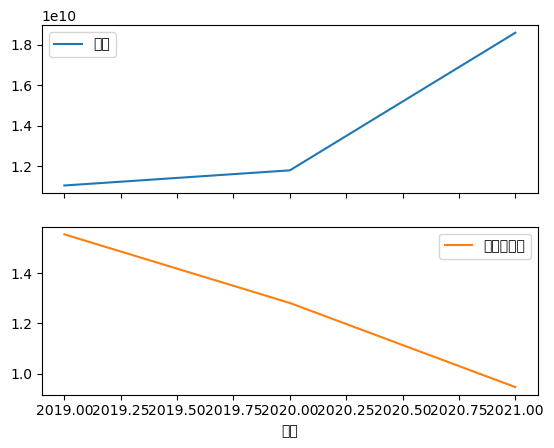

In [60]:
# 시각화 해볼까요? (한글폰트는 원래 깨짐)
gb.plot(subplots=True);

## 2. Pandas 보충

    각 데이터별로 하나라도 NaN값이 있는 팽귄을 찾아봅시다

In [61]:
from seaborn import load_dataset
df = load_dataset('penguins')
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [68]:
# 결측치(NaN) 값을 찾아보자 -> nan은 연산자가 먹히지 않는다
#df == np.nan -> 작동하지 않음
idx = df.isnull().sum(axis=1) >= 1# isnull()과 동일한 역할
df.loc[idx]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


In [ ]:
# True는 1, False는 0인 성질을 사용
idx = df.isna().sum(axis=1) >=1 
# 이걸 인덱스로 주면 되겠다!!

In [69]:
# True인 index만 추출합니다
df[idx]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


## 3. Quant 기초 of 기초

Pandas를 배웠으니 나도 퀀트 할 수 있다!

In [70]:
# 불러올때 datetime 자료형으로 바꿔주는 parse_dates
amzn = pd.read_csv("Data/AMZN.csv", index_col=0,
                   parse_dates=True)

amzn.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,8.7945,8.9740,8.7775,8.9515,8.9515,102216000
2012-01-04,8.9605,9.0250,8.8035,8.8755,8.8755,84104000
2012-01-05,8.7970,8.9125,8.7025,8.8805,8.8805,76182000
2012-01-06,8.9035,9.2325,8.8750,9.1305,9.1305,140168000
2012-01-09,9.1380,9.2185,8.8500,8.9280,8.9280,101138000


In [77]:
# 수정주가만 따로 keep
price = amzn[["Adj Close"]].copy()

# pct_change로 수익률 계산
price["daily_return"] = price.pct_change()
price
price = price.dropna()
price.head()

,Adj Close,daily_return
Date,,
2012-01-04,8.8755,-0.008490
2012-01-05,8.8805,0.000563
2012-01-06,9.1305,0.028152
2012-01-09,8.9280,-0.022178
2012-01-10,8.9670,0.004368


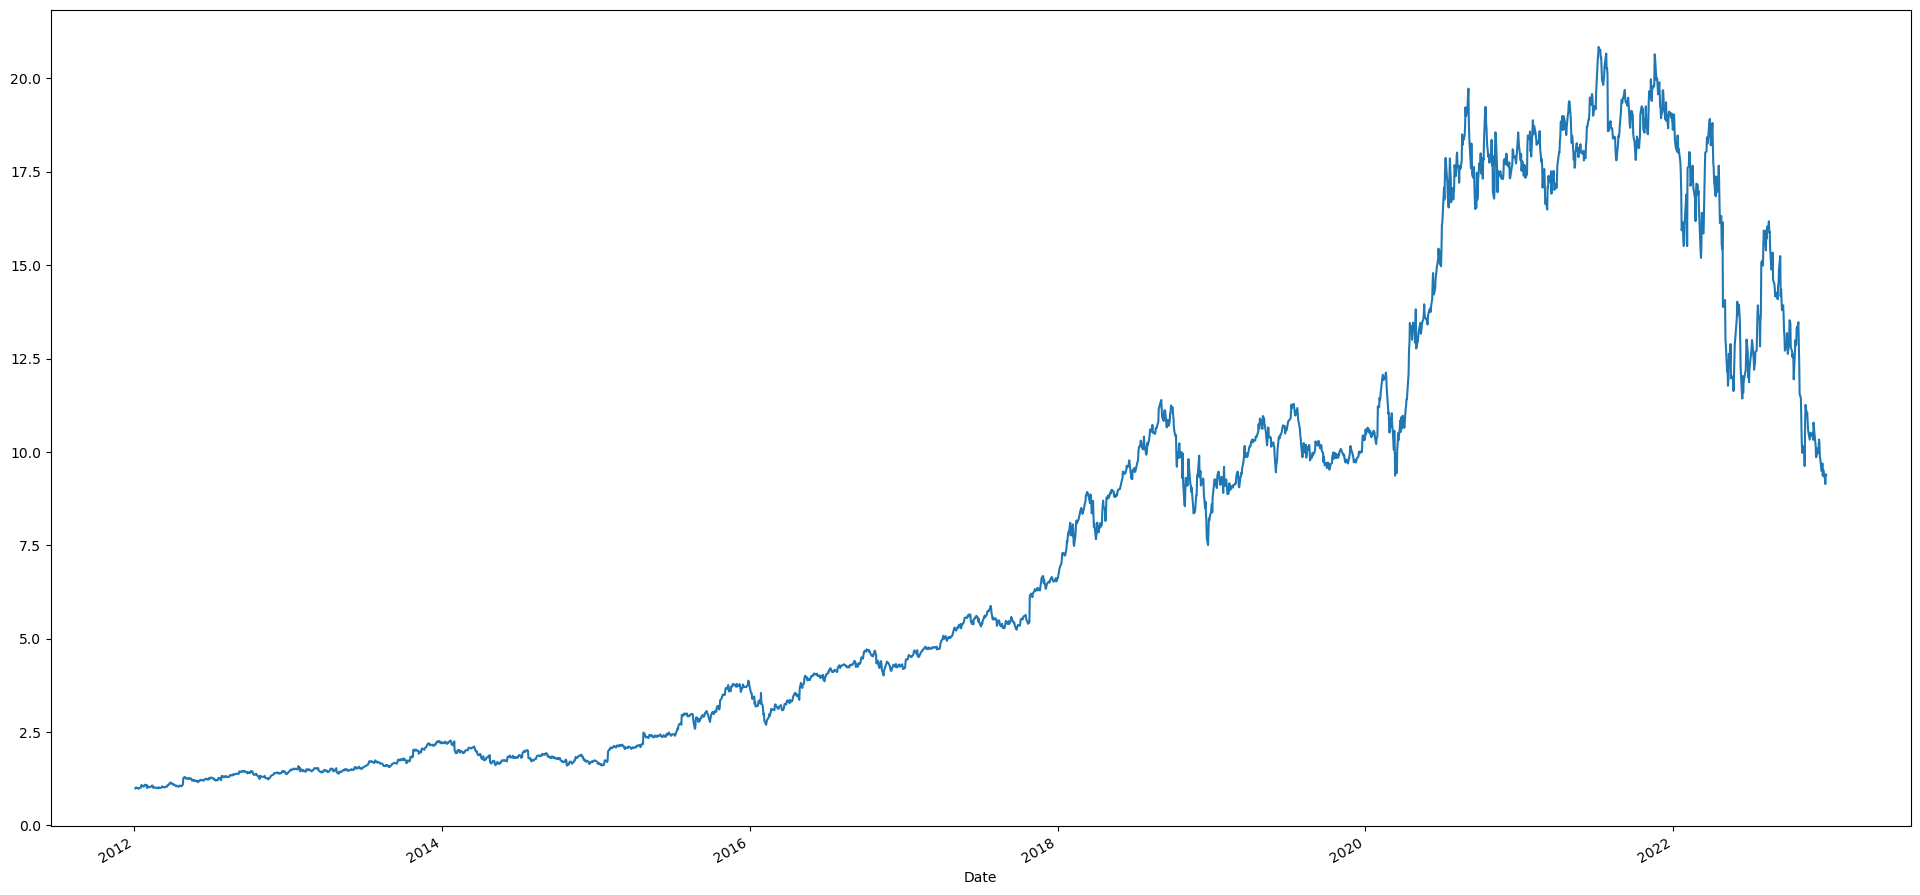

In [79]:
# 누적 곱 -> 바이앤홀드 전략의 수익률의 변화를 계산할 수 있음
(1+price["daily_return"]).cumprod() \
                         .plot(figsize=(24,12));
                         
# 첫날 자산이 1이 된다

수익률 CAGR 계산

$CAGR =$ $({V(t_n) \over V(t_0)}) ^ {1 \over {t_n - t_0}} - 1$

In [86]:
# CAGR 계산 / V(t_n) - V(t_0)

# iloc[-1]로 마지막 값, iloc[0]으로 처음 값을 가져온다
cagr = (price["Adj Close"].iloc[-1] / price["Adj Close"].iloc[0]) ** (252/len(price)) -1

print("CAGR:{}%".format((cagr*100).round(2)))

CAGR:22.71%
